<a href="https://colab.research.google.com/github/jvrjsanchez/sort_algos/blob/master/81-Cap08/Projeto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
## <font color='blue'>Engenharia Financeira com Inteligência Artificial</font>
## <font color='blue'>Projeto 3</font>
## <font color='blue'>Portfólio de Investimento com Fronteira Eficiente e Otimização Matemática</font>

## Instalando e Carregando Pacotes

In [1]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark.
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.7 MB/s eta 0:00:00


In [2]:
# Instala o pacote
#!pip install -q yfinance

In [3]:
# Imports
import scipy
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')

In [4]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



## Definindo os Ativos Financeiros Para o Portfólio

In [5]:
# Define os assets e faz o download dos dados
df_dsa = yf.download(['NU',
                      'CRM',
                      'SNOW',
                      'QUBT',
                      'SOFI',
                      'ZETA',
                      'AMD',
                      'IREN',
                      'YELP',
                      'TSM'],
                     start = '2025-06-01', end = '2025-09-30')

[*********************100%***********************]  10 of 10 completed


In [6]:
# Separa a coluna com o valor de fechamento
df_dsa = df_dsa['Close']

In [7]:
# Shape
df_dsa.shape

(83, 10)

In [8]:
# Amostra dos dados
df_dsa.head()

Ticker,AMD,CRM,IREN,NU,QUBT,SNOW,SOFI,TSM,YELP,ZETA
Date,,,,,,,,,,
2025-06-02,114.629997,260.751740,8.73,12.00,11.80,210.169998,13.67,193.519638,37.150002,12.93
2025-06-03,117.309998,263.592285,8.89,11.99,12.40,209.149994,13.66,196.270889,37.500000,13.17
2025-06-04,118.580002,262.296631,9.43,11.94,12.83,209.600006,13.46,201.028412,37.450001,13.20
2025-06-05,115.690002,266.253418,8.95,12.11,11.83,210.100006,13.67,201.962051,36.799999,13.64
2025-06-06,116.190002,273.598969,9.75,12.15,13.70,210.839996,14.24,203.789581,37.000000,13.91


## Calculando a Variação Percentual

In [9]:
# Calcula os retornos
retornos = df_dsa.pct_change()

O método pct_change() calcula a variação percentual entre o elemento atual e o anterior em cada coluna. Por padrão, o cálculo é feito linha a linha (ou seja, ao longo do eixo 0). O primeiro elemento de cada coluna resulta em NaN (Not a Number), pois não há um valor anterior para calcular a variação percentual.

No contexto de análise financeira, essa operação é frequentemente usada para calcular os retornos diários, mensais ou anuais de ativos, como ações ou criptomoedas, a partir de seus preços históricos. Os retornos calculados são úteis para várias análises, incluindo avaliação de desempenho de investimentos, modelagem de risco e otimização de portfólios.

In [10]:
# Drop de valores na
retornos = retornos.dropna()

In [11]:
retornos.tail()

Ticker,AMD,CRM,IREN,NU,QUBT,SNOW,SOFI,TSM,YELP,ZETA
Date,,,,,,,,,,
2025-09-23,0.006947,-0.020545,-0.003103,-0.009202,0.059129,-0.026139,-0.024153,0.036973,-0.011342,-0.024004
2025-09-24,-0.000124,0.005438,0.128561,-0.008669,0.000234,-0.004339,-0.022344,-0.007074,0.001912,-0.045476
2025-09-25,0.002424,-0.020090,-0.018031,-0.014366,-0.038767,-0.004358,-0.011252,-0.014428,-0.004453,-0.012640
2025-09-26,-0.011223,0.010293,-0.095701,0.000000,-0.021137,0.013718,-0.004979,-0.011928,0.005751,0.010340
2025-09-29,0.011915,0.006860,0.097229,0.010773,-0.064284,0.002715,-0.015368,-0.000475,-0.003494,0.025341


In [12]:
# Calcula a média
media_retornos = retornos.mean()

In [13]:
print("Média do Retornos Percentuais:")
print(media_retornos)

Média do Retornos Percentuais:
Ticker
AMD     0.004538
CRM    -0.000620
IREN    0.021886
NU      0.003772
QUBT    0.008158
SNOW    0.001268
SOFI    0.009009
TSM     0.004377
YELP   -0.001913
ZETA    0.007101
dtype: float64


<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
## Simulando Diferentes Combinações de Pesos Para os Ativos do Portfólio

In [14]:
# Define a semente aleatória para garantir a reprodutibilidade dos resultados
np.random.seed(42)

In [15]:
# Define o número de portfólios a serem simulados
num_ports = 10000

In [16]:
# Inicializa uma matriz para armazenar os pesos de cada ativo nos portfólios
all_pesos = np.zeros((num_ports, 10))

In [17]:
# Inicializa um array para armazenar os retornos esperados de cada portfólio
ret_arr = np.zeros(num_ports)

In [18]:
# Inicializa um array para armazenar a volatilidade (risco) de cada portfólio
vol_arr = np.zeros(num_ports)

In [19]:
# Inicializa um array para armazenar a relação Sharpe de cada portfólio
sharpe_arr = np.zeros(num_ports)

In [20]:
# Calcula a matriz de covariância
cov_matrix = retornos.cov()

Uma matriz de covariância é uma ferramenta estatística que mede a covariância (ou seja, a medida de como duas variáveis mudam conjuntamente) entre pares de variáveis em um conjunto de dados. Em outras palavras, ela ajuda a entender como duas variáveis se movem em relação uma à outra. No contexto de finanças, por exemplo, é frequentemente usada para analisar como os retornos de diferentes ativos se movem juntos, o que é fundamental para a diversificação e gestão de risco de portfólios de investimento.

## Calculando Retorno Esperado, Volatilidade e Índice de Sharpe

In [21]:
# Loop para calcular retorno esperado, volatilidade esperada e Sharpe Ratio
for x in range(num_ports):

    # Define os pesos
    pesos = np.array(np.random.random(10))
    pesos = pesos / np.sum(pesos)

    # Salva os pesos
    all_pesos[x,:] = pesos

    # Retorno esperado
    ret_arr[x] = np.sum((media_retornos * pesos * len(retornos)))

    # Volatilidade esperada
    vol_arr[x] = np.sqrt(np.dot(pesos.T, np.dot(cov_matrix * len(retornos), pesos)))

    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x] / vol_arr[x]

O loop acima itera por um número definido de portfólios (num_ports), simulando diferentes combinações de pesos para os ativos de cada portfólio, calculando e armazenando suas características principais: retorno esperado, volatilidade e relação Sharpe.

Para cada portfólio (x) dentre o total especificado (num_ports), realiza os seguintes passos:
<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
**Geração de Pesos**: Gera um conjunto aleatório de pesos para 10 ativos em um portfólio. Esses pesos são normalizados para que a soma seja 1, garantindo que o total investido seja distribuído proporcionalmente entre os 10 ativos.

**Armazenamento de Pesos**: Salva os pesos gerados na matriz all_pesos, que mantém um registro dos pesos de cada ativo para cada simulação de portfólio.

**Cálculo do Retorno Esperado**: Calcula o retorno esperado do portfólio multiplicando os retornos médios de cada ativo (media_retornos) pelos pesos e pelo número de retorno (len(retornos)). O resultado é armazenado em ret_arr.

**Cálculo da Volatilidade Esperada**: Utiliza a matriz de covariância dos retornos dos ativos (retornos.cov()) para calcular a volatilidade esperada do portfólio. A matriz de covariância é ajustada pelo número de períodos de retorno e a volatilidade é calculada como a raiz quadrada da variância do portfólio, que é obtida através do produto matricial dos pesos pelo quadrado da matriz de covariância. O resultado é armazenado em vol_arr.

**Cálculo da Relação Sharpe**: Calcula a relação Sharpe para cada portfólio como o quociente entre seu retorno esperado e sua volatilidade. Este valor, armazenado em sharpe_arr, mede o retorno ajustado ao risco de cada portfólio, permitindo identificar aqueles que oferecem o melhor retorno por unidade de risco assumido.

## Interpretando o Sharpe Ratio Máximo

In [22]:
# 5 primeiras linhas de Pesos
all_pesos[:5]

array([[0.07200801, 0.18278161, 0.14073106, 0.11509637, 0.0299957 ,
        0.02999106, 0.01116699, 0.16652855, 0.11556865, 0.13613201],
       [0.00520773, 0.24538041, 0.21060217, 0.05372031, 0.04600045,
        0.04640006, 0.07697116, 0.13275971, 0.10927907, 0.07367894],
       [0.15281528, 0.03483974, 0.07296552, 0.09150188, 0.11390722,
        0.19610414, 0.04987017, 0.12843427, 0.1479604 , 0.01160137],
       [0.11929704, 0.03348399, 0.01277348, 0.18632243, 0.18961076,
        0.15873628, 0.05981372, 0.01917882, 0.13435547, 0.086428  ],
       [0.03016589, 0.12239978, 0.00850029, 0.22476941, 0.06396626,
        0.16376487, 0.07704997, 0.12855247, 0.135138  , 0.04569305]])

In [23]:
# 5 primeiros Retornos
ret_arr[:5]

array([0.458023  , 0.54991414, 0.37742462, 0.34691626, 0.25806899])

In [24]:
# 5 primeiros valores de Volatilidade
vol_arr[:5]

array([0.1550863 , 0.17138411, 0.16069992, 0.19515908, 0.14178398])

In [25]:
# 5 primeiros valores de Sharpe Ratio
sharpe_arr[:5]

array([2.95334276, 3.20866462, 2.34862979, 1.77760759, 1.82015612])

In [26]:
print("Sharpe Ratio Máximo:", sharpe_arr.max())

Sharpe Ratio Máximo: 4.133534646174152


O valor de Sharpe Ratio Máximo indica que o melhor portfólio simulado, dentre as combinações testadas, oferece um retorno ajustado ao risco excepcionalmente alto.

A Relação Sharpe é uma métrica que avalia o desempenho ajustado ao risco de um investimento, comparando seu retorno em excesso (o retorno além da taxa livre de risco) com sua volatilidade.

Uma Relação Sharpe:

- Maior que 1 é considerada boa, indicando que o retorno em excesso do investimento compensa adequadamente pelo risco assumido.
- Maior que 2 é considerada muito boa, sugerindo que o investimento oferece um retorno em excesso significativamente maior por cada unidade de risco.
- Maior que 3 é considerada excepcional, indicando um investimento de alta performance em termos de retorno ajustado ao risco.
<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
Assim, um valor acima coloca o portfólio no patamar de desempenho "muito bom", demonstrando que, para cada unidade de risco assumido, o portfólio gera um retorno substancialmente maior em comparação com portfólios de menor relação Sharpe.

Este é um indicativo de que a combinação de ativos deste portfólio específico, juntamente com a distribuição de seus pesos, foi otimizada de forma eficaz para maximizar o retorno ajustado ao risco. Investidores que buscam um equilíbrio entre risco e retorno podem considerar esse portfólio como uma opção atrativa, dada sua alta eficiência em termos de performance ajustada ao risco.

## Melhores Pesos Atribuídos a Cada Ativo Financeiro com Base no Sharpe Ratio

In [27]:
# Extrai o valor máximo
indice = sharpe_arr.argmax()

In [28]:
# Inicializa o contador
contador = 0

In [29]:
# Inicia um loop para iterar através da lista de símbolos de ações
for i in ('NU', 'CRM', 'SNOW', 'QUBT', 'SOFI', 'ZETA', 'AMD', 'IREN', 'YELP', 'TSM'):

    # Imprime o peso atribuído a cada símbolo de ação no portfólio, arredondando para 3 casas decimais
    print("Peso Atribuído a", i, ": ", round(all_pesos[indice,:][contador], 3))

    # Incrementa o contador para avançar para o próximo peso na lista de pesos do portfólio
    contador += 1

Peso Atribuído a NU :  0.072
Peso Atribuído a CRM :  0.001
Peso Atribuído a SNOW :  0.26
Peso Atribuído a QUBT :  0.087
Peso Atribuído a SOFI :  0.025
Peso Atribuído a ZETA :  0.026
Peso Atribuído a AMD :  0.164
Peso Atribuído a IREN :  0.293
Peso Atribuído a YELP :  0.043
Peso Atribuído a TSM :  0.029


In [30]:
print("Soma dos Pesos:", sum(all_pesos[indice,:]))

Soma dos Pesos: 0.9999999999999999


<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
## Gráfico de Retorno x Risco x Sharpe Ratio

In [31]:
# Extrai os valores máximos
max_sr_ret = ret_arr[indice]
max_sr_vol = vol_arr[indice]

In [32]:
max_sr_ret

np.float64(0.7757403657881415)

In [33]:
max_sr_vol

np.float64(0.1876699803414345)

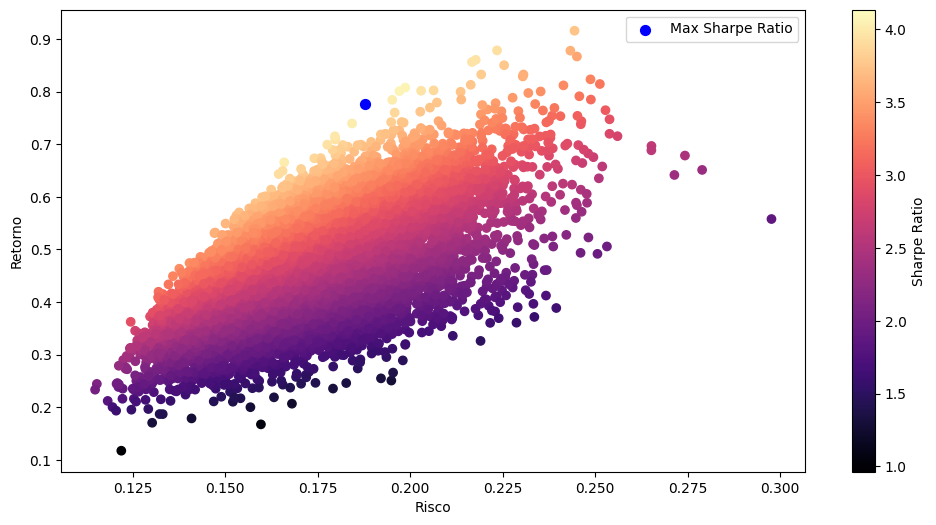

In [34]:
# Plot
plt.figure(figsize = (12,6))
plt.scatter(vol_arr, ret_arr, c = sharpe_arr, cmap = 'magma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Risco')
plt.ylabel('Retorno')
plt.scatter(max_sr_vol, max_sr_ret, c = 'blue', s = 50, label = 'Max Sharpe Ratio')
plt.legend()
plt.show()

Fizemos o processo manualmente. Agora vamos automatizá-lo para encontrar os melhores valores de pesos que geram o maior valor de Sharpe Ratio.

## Teoria da Média-Variância Para Construir a Fronteira Eficiente

In [35]:
# Define uma função para calcular o retorno, volatilidade e relação Sharpe de um portfólio com base nos pesos
def dsa_get_ret_vol_sr(weights):

    # Converte os pesos de entrada para um array NumPy para facilitar cálculos matemáticos
    weights = np.array(weights)

    # Calcula o retorno esperado do portfólio, multiplicando os retornos médios dos ativos
    # pelos pesos e pelo número de períodos de retorno
    ret = np.sum(media_retornos * weights) * len(retornos)

    # Calcula a volatilidade do portfólio, que é a raiz quadrada do produto matricial dos pesos
    # pelo quadrado da matriz de covariância ajustada pelo número de períodos de retorno
    vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * len(retornos), weights)))

    # Calcula a relação Sharpe do portfólio, dividindo o retorno pelo nível de volatilidade
    sr = ret / vol

    # Retorna um array NumPy contendo o retorno esperado, volatilidade e relação Sharpe do portfólio
    return np.array([ret, vol, sr])

Para maximizar o índice de sharpe positivo, temos que minimizar o negativo do índice de sharpe porque a função de otimização funciona apenas no valor mínimo de uma função. Isso é essencialmente o que fazemos em qualquer modelo de IA.

In [36]:
# Define uma função para calcular o negativo da relação Sharpe de um portfólio,
# que é usada como função objetivo em processos de otimização
def dsa_neg_sharpe(weights):

    # Chama a função get_ret_vol_sr para os pesos fornecidos,
    # obtém a relação Sharpe (índice [2] do array retornado)
    # e multiplica por -1 para torná-la negativa
    return dsa_get_ret_vol_sr(weights)[2] * -1

In [37]:
# Define uma função para verificar se a soma dos pesos dos ativos em um portfólio é igual a 1,
# o que é uma restrição comum em otimização de portfólio
def dsa_check_sum(weights):

    # Retorna a diferença entre a soma dos pesos fornecidos e 1, o resultado deve ser 0 se os pesos
    # somarem exatamente 1
    return np.sum(weights) - 1

## Definindo as Restrições do Problema de Otimização

In [38]:
# Define uma restrição de igualdade para garantir que a soma dos pesos dos ativos no portfólio seja igual a 1
cons = ({'type': 'eq', 'fun': dsa_check_sum})

In [39]:
# Define os limites para cada peso do portfólio,
# estabelecendo que cada peso pode variar entre 0.0 (0%) e 1.0 (100%)
limite = (0.0, 1.0)

In [40]:
# Cria uma tupla de limites para cada um dos 10 ativos no portfólio, aplicando o limite definido acima a cada um
limites = tuple(limite for asset in range(10))

In [41]:
# Define um palpite inicial para os pesos dos ativos no portfólio, começando com 10% para cada um dos 10 ativos
init_guess = [0.1 for i in range(10)]

## Otimização com SLSQP (Sequential Least Squares Programming)

Veja a descrição de SLSQP no videobook do Capítulo 6.

In [42]:
# Utiliza a função minimize do scipy.optimize para encontrar os pesos dos ativos que minimizam
# a negação da relação Sharpe, indicando a otimização do portfólio para o máximo retorno ajustado ao risco.
# Usa o método 'SLSQP' (Sequential Least Squares Programming), limites para cada peso do ativo
# e a restrição de que a soma dos pesos deve ser igual a 1.
resultado_otimizacao = minimize(dsa_neg_sharpe,
                                init_guess,
                                method = 'SLSQP',
                                bounds = limites,
                                constraints = cons)

In [43]:
print(resultado_otimizacao)

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: -4.4163251222751985
           x: [ 7.999e-02  3.141e-16  2.955e-01  8.022e-16  0.000e+00
                0.000e+00  3.334e-01  2.604e-01  0.000e+00  3.075e-02]
         nit: 13
         jac: [-9.490e-04  9.776e-01 -1.599e-04  3.609e-01  2.103e+00
                1.095e+00  1.192e-07  1.372e-04  1.727e+00  2.844e-03]
        nfev: 148
        njev: 13
 multipliers: [ 3.410e-05]


Os resultados da otimização indicam um sucesso na busca pelos pesos ótimos dos ativos em um portfólio que maximiza a relação Sharpe, ajustando-se pelo risco. Aqui está o que cada elemento do resultado significa:

**message: "Optimization terminated successfully"** - A otimização terminou com sucesso, o que significa que o processo de otimização encontrou uma solução sem enfrentar erros significativos.

**success: True** - Confirma que a otimização foi bem-sucedida.

**status: 0** - Um código de status de 0 geralmente indica uma conclusão bem-sucedida do algoritmo de otimização.

**fun**: O valor da função objetivo (negativo da relação Sharpe) no ótimo encontrado. O valor negativo é usado por convenção na otimização para transformar um problema de maximização (maximizar a relação Sharpe) em minimização (minimizar o negativo da relação Sharpe). O valor real da relação Sharpe é o positivo deste número.

**x:** Array que mostra a distribuição de pesos ótimos para cada um dos 10 ativos no portfólio. Valores próximos a zero indicam que o ativo correspondente tem pouca ou nenhuma participação no portfólio otimizado.

**nit:** O número de iterações do algoritmo até encontrar a solução ótima.

**jac**: Array que mostra o gradiente da função objetivo (negativo da relação Sharpe) em relação aos pesos no ponto ótimo. Esses valores ajudam a entender a sensibilidade da relação Sharpe a mudanças nos pesos dos ativos próximos ao ótimo.

**nfev:** O número de avaliações da função objetivo que o algoritmo realizou. Isso dá uma ideia do esforço computacional envolvido.

**njev:** O número de avaliações do jacobiano (ou gradiente) da função objetivo, indicando quantas vezes o gradiente foi calculado durante a otimização.

Interpretando estes resultados, você pode concluir que a otimização foi bem-sucedida e resultou em um portfólio que maximiza a relação Sharpe, indicando um alto retorno ajustado ao risco. A distribuição de pesos sugere uma concentração do investimento em poucos ativos espcificamente, com os demais ativos recebendo pouca ou nenhuma alocação.

## Construção, Plot e Interpretação da Fronteira Eficiente

In [44]:
# Extraindo os valores de x (melhores pesos)
resultado_otimizacao.x

array([7.99923811e-02, 3.14072560e-16, 2.95510427e-01, 8.02238457e-16,
       0.00000000e+00, 0.00000000e+00, 3.33369596e-01, 2.60379117e-01,
       0.00000000e+00, 3.07484786e-02])

In [45]:
# Aplica a função e calcula retorno, volatilidade e sharpe ratio
dsa_get_ret_vol_sr(resultado_otimizacao.x)

array([0.91774707, 0.20780786, 4.41632512])

In [46]:
# Define os valores para as coordenadas da fronteira em y
frontier_y = np.linspace(0.0, 0.60, num = 200)

In [47]:
# Função para retornar a volatilidade
def dsa_retorna_volatilidade(weights):
    return dsa_get_ret_vol_sr(weights)[1]

A função acima é definida para retornar a volatilidade do portfólio de investimentos, que é calculada com base nos pesos dos ativos dentro desse portfólio. Essa função utiliza outra função chamada dsa_get_ret_vol_sr(weights), que calcula três características importantes de um portfólio com base nos pesos dos ativos: o retorno esperado do portfólio ([0]), a volatilidade do portfólio ([1]) e a relação Sharpe do portfólio ([2]). A função dsa_minimize_volatility() é focada especificamente na volatilidade, por isso retorna o segundo elemento do array resultante da função dsa_get_ret_vol_sr, correspondente à volatilidade ([1]).

In [48]:
# Lista para os valores das coordenadas da fronteira em x
frontier_x = []

In [49]:
# Inicia um loop para iterar por uma lista de retornos esperados (frontier_y),
# que faz parte da construção da fronteira eficiente
for retorno_possivel in frontier_y:

    # Define restrições para a otimização: uma garante que a soma dos pesos seja 1 (check_sum)
    # e a outra garante que o retorno esperado do portfólio seja igual ao retorno possível atual na iteração
    cons = ({'type':'eq', 'fun': dsa_check_sum},
            {'type':'eq', 'fun': lambda w: dsa_get_ret_vol_sr(w)[0] - retorno_possivel})

    # Realiza a otimização para minimizar a volatilidade (risco) do portfólio sob as restrições definidas,
    # usando um palpite inicial (init_guess), método 'SLSQP', limites definidos para os pesos (bounds)
    # e as restrições (cons)
    resultado = minimize(dsa_retorna_volatilidade,
                         init_guess,method = 'SLSQP',
                         bounds = limites,
                         constraints = cons)

    # Após a otimização, adiciona o resultado (valor mínimo da função, que é a volatilidade mínima para o
    # retorno dado) à lista frontier_x, que representa as volatilidades na fronteira eficiente para os retornos
    # especificados em frontier_y
    frontier_x.append(resultado['fun'])

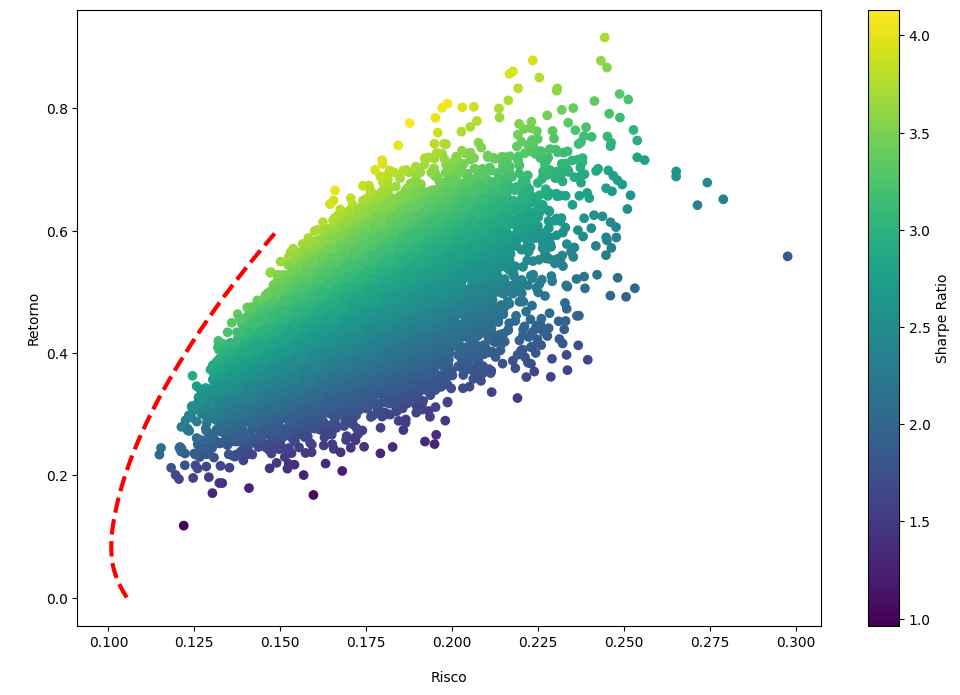

In [50]:
# Plot
plt.figure(figsize = (12,8))
plt.scatter(vol_arr, ret_arr, c = sharpe_arr, cmap = 'viridis')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('\nRisco')
plt.ylabel('\nRetorno')
plt.plot(frontier_x, frontier_y, 'r--', linewidth = 3)
plt.show()

Conforme visto no gráfico acima, o retorno máximo que podemos obter é de cerca de 0,6 com um risco de cerca de 0,22 e o retorno mínimo que podemos obter é de cerca de 0,01 com um risco de cerca de 0,05.

Agora precisamos definir quanto alocar de cada asset financeiro em nosso portfólio para obter o maior retorno possível.

# Vamos Trabalhar na Parte 2 do Projeto 3!

Começaremos definindo alguns parâmetros!

In [51]:
# Número de portfólios
num_portfolios = 10000

In [52]:
# Taxa livre de risco
taxa_livre_risco = 0.015

Leia o e-book com a definição de Taxa Livre de Risco no Capítulo 8 do curso.

## Função Para Calcular a Performance do Portfólio

In [53]:
# Função
def dsa_portfolio_performance(weights, mean_returns, cov_matrix):

    # Calcula o retorno esperado do portfólio, multiplicando os retornos médios pelos
    # pesos e depois pelo número de períodos de negociação (62)
    returns = np.sum(mean_returns * weights) * 62

    # Calcula o desvio padrão do portfólio, que é uma medida de risco, usando a matriz
    # de covariância e os pesos, ajustado para os períodos de negociação
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(62)

    # Retorna o desvio padrão e os retornos do portfólio
    return std, returns

## Função Para Retornar o Negativo do Sharpe Ratio do Portfólio

In [54]:
# Função
def dsa_neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):

    # Chama a função portfolio_performance para obter o desvio padrão e retorno do portfólio
    # baseado nos pesos atuais
    p_var, p_ret = dsa_portfolio_performance(weights, mean_returns, cov_matrix)

    # Retorna o negativo do Sharpe Ratio do portfólio, que é o retorno em excesso em relação
    # à taxa livre de risco dividido pelo desvio padrão
    return -(p_ret - risk_free_rate) / p_var

## Função Para Maximizar o Sharpe Ratio do Portfólio

In [55]:
# Função
def dsa_max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):

    # Determina o número de ativos no portfólio com base no comprimento da lista de retornos médios
    num_assets = len(mean_returns)

    # Empacota os argumentos necessários para a função neg_sharpe_ratio
    args = (mean_returns, cov_matrix, risk_free_rate)

    # Define uma restrição para que a soma dos pesos dos ativos seja igual a 1
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

    # Define o limite individual para cada peso de ativo, que deve estar entre 0 e 1
    bound = (0.0,1.0)

    # Cria uma tupla de limites para todos os ativos, aplicando o mesmo limite a cada um
    bounds = tuple(bound for asset in range(num_assets))

    # Usa a função minimize do scipy para encontrar os pesos dos ativos que maximizam o Sharpe Ratio
    # Minimiza o negativo do Sharpe Ratio para efetivamente maximizar o Sharpe Ratio original
    result = minimize(dsa_neg_sharpe_ratio,
                      num_assets * [1./num_assets,],  # Inicializa os pesos igualmente distribuídos entre os ativos
                      args = args,  # Passa os argumentos para a função neg_sharpe_ratio
                      method = 'SLSQP',  # Utiliza o método de otimização Sequencial Least Squares Programming
                      bounds = bounds,  # Aplica os limites definidos para os pesos
                      constraints = constraints)  # Aplica a restrição de que a soma dos pesos deve ser 1

    # Retorna o resultado da otimização
    return result

## Função Para Calcular a Volatilidade do Portfólio

In [56]:
# Função
def dsa_portfolio_volatility(weights, mean_returns, cov_matrix):
    return dsa_portfolio_performance(weights, mean_returns, cov_matrix)[0]

## Função Para Minimizar a Volatilidade do Portfólio

In [57]:
# Função
def dsa_min_variance(mean_returns, cov_matrix):

    # Calcula o número de ativos no portfólio com base no comprimento da lista de retornos médios
    num_assets = len(mean_returns)

    # Prepara os argumentos que serão passados para a função de cálculo da volatilidade do portfólio
    args = (mean_returns, cov_matrix)

    # Define uma restrição para garantir que a soma dos pesos dos ativos no portfólio seja igual a 1
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

    # Estabelece um limite para cada peso no portfólio, cada peso deve estar entre 0 e 1
    bound = (0.0,1.0)

    # Cria uma lista de limites aplicando o mesmo limite a cada ativo no portfólio
    bounds = tuple(bound for asset in range(num_assets))

    # Utiliza a função minimize para encontrar a configuração de pesos que minimiza a volatilidade do portfólio
    # Inicializa os pesos igualmente distribuídos entre os ativos
    result = minimize(dsa_portfolio_volatility,
                      num_assets * [1./num_assets,],
                      args = args,  # Passa os argumentos necessários para o cálculo da volatilidade
                      method = 'SLSQP',  # Utiliza o método Sequential Least Squares Programming para otimização
                      bounds = bounds,  # Define os limites para os pesos dos ativos
                      constraints = constraints)  # Aplica a restrição de soma dos pesos

    # Retorna o resultado da otimização, que inclui os pesos dos ativos que minimizam a volatilidade
    return result

## Função Para Calcular o Retorno Eficiente

In [58]:
# Função
def dsa_efficient_return(mean_returns, cov_matrix, target):

    # Calcula o número de ativos no portfólio com base no comprimento da lista de retornos médios
    num_assets = len(mean_returns)

    # Prepara os argumentos que serão passados para a função de cálculo da performance do portfólio
    args = (mean_returns, cov_matrix)

    # Define uma função auxiliar para calcular o retorno do portfólio com base nos pesos dos ativos
    def portfolio_return(weights):
        return dsa_portfolio_performance(weights, mean_returns, cov_matrix)[1]

    # Define duas restrições:
    # 1. O retorno do portfólio deve igualar-se ao retorno alvo especificado
    # 2. A soma dos pesos dos ativos deve ser igual a 1
    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

    # Estabelece um limite para cada peso no portfólio, cada peso deve estar entre 0 e 1
    bounds = tuple((0,1) for asset in range(num_assets))

    # Utiliza a função minimize para encontrar a configuração de pesos que minimiza a volatilidade do portfólio
    # Inicializa os pesos igualmente distribuídos entre os ativos
    result = minimize(dsa_portfolio_volatility,
                      num_assets * [1./num_assets,],
                      args = args,  # Passa os argumentos necessários para o cálculo da volatilidade
                      method = 'SLSQP',  # Utiliza o método Sequential Least Squares Programming para otimização
                      bounds = bounds,  # Define os limites para os pesos dos ativos
                      constraints = constraints)  # Aplica as restrições definidas

    # Retorna o resultado da otimização, que inclui os pesos dos ativos que alcançam o retorno alvo minimizando a volatilidade
    return result

## Função Para Calcular a Fronteira Eficiente

In [59]:
# Função
def dsa_efficient_frontier(mean_returns, cov_matrix, returns_range):

    # Inicializa uma lista para armazenar os resultados de portfólios eficientes para diferentes retornos alvo
    efficients = []

    # Itera sobre um intervalo de retornos alvo
    for ret in returns_range:

        # Calcula e adiciona à lista o resultado da otimização para cada retorno alvo
        efficients.append(dsa_efficient_return(mean_returns, cov_matrix, ret))

    # Retorna a lista de resultados, cada um representando um portfólio otimizado para
    # um retorno específico dentro do intervalo
    return efficients

## Funções Auxiliares

In [60]:
# Função
def dsa_print_stats(rp, sdp, max_sharpe_allocation, rp_min, sdp_min, min_vol_allocation, show_portfolio = True):

    print ("-"*80)
    print ("Alocação do Portfólio com Índice Sharpe Máximo\n")
    print ("Retorno Durante Período de 3 Meses:", round(rp,3))
    print ("Risco Durante Período de 3 Meses:", round(sdp,3))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Alocação de Portfólio com Risco Mínimo\n")
    print ("Retorno Durante Período de 3 Meses:", round(rp_min,3))
    print ("Risco Durante Período de 3 Meses:", round(sdp_min,3))
    print ("\n")
    print (min_vol_allocation)

    # Verifica se a flag show_portfolio é verdadeira para imprimir informações adicionais
    if (show_portfolio == True):

        # Calcula a volatilidade anualizada dos retornos
        an_vol = np.std(retornos) * np.sqrt(62)

        # Calcula o retorno anualizado
        an_rt = media_retornos * 62

        # Imprime uma linha divisória para separar visualmente as seções do output
        print ("-"*80)

        # Cabeçalho para a seção de retornos e risco individual de cada ação
        print ("Retornos e Riscos de Ativos Individuais\n")

        # Loop para imprimir o retorno e o risco de cada ação individualmente
        for i, txt in enumerate(df_dsa.columns):
            print (txt,":",
                   "Retorno Durante Período de 3 Meses",
                   round(an_rt[i],3),
                   ", Risco Durante Período de 3 Meses:",
                   round(an_vol[i],3))

        # Imprime uma linha divisória para concluir a seção
        print ("-"*80)

In [61]:
# Função
def dsa_plot_stats(results, sdp, rp, sdp_min, rp_min, frontier_flag = True):

    # Cria uma figura para plotar os gráficos com tamanho especificado
    plt.figure(figsize = (12, 7))

    # Plota os resultados de simulação como um gráfico de dispersão para visualizar a distribuição de portfólios
    plt.scatter(results[0,:],
                results[1,:],
                c = results[2,:],
                cmap = 'YlGnBu',
                marker = 'o',
                s = 10,
                alpha = 0.3)

    # Adiciona uma barra de cores ao gráfico para representar a escala de valores do Sharpe Ratio
    plt.colorbar()

    # Destaca o portfólio com o máximo Sharpe Ratio com um marcador estrela em vermelho
    plt.scatter(sdp,
                rp,
                marker = '*',
                color = 'r',
                s = 500,
                label = 'Sharpe Ratio Máximo')

    # Destaca o portfólio com o mínimo risco com um marcador estrela em verde
    plt.scatter(sdp_min,
                rp_min,
                marker = '*',
                color = 'g',
                s = 500,
                label = 'Risco Mínimo')

    # Condição para não mostrar a fronteira eficiente se a flag estiver desativada
    if (frontier_flag == False):

        # Define o título do gráfico
        plt.title('Otimização de Portfólio Simulada com Base na Fronteira Eficiente')

        # Define o rótulo do eixo x
        plt.xlabel('\nRisco Durante Período de 3 Meses')

        # Define o rótulo do eixo y
        plt.ylabel('Retorno Durante Período de 3 Meses')

        # Exibe a legenda do gráfico
        plt.legend(labelspacing = 0.8)

        # Termina a função antes de plotar a fronteira eficiente
        return

    # Define um intervalo de retornos alvo para calcular a fronteira eficiente
    target = np.linspace(rp_min, 0.40, 500)

    # Calcula os portfólios eficientes para os retornos alvo definidos
    efficient_portfolios = dsa_efficient_frontier(mean_returns, cov_matrix, target)

    # Plota a fronteira eficiente como uma linha pontilhada preta
    plt.plot([p['fun'] for p in efficient_portfolios],
             target,
             linestyle = '-.',
             color = 'black',
             label = 'Fronteira Eficiente')

    # Define o título do gráfico
    plt.title('Otimização de Portfólio Calculada com Base na Fronteira Eficiente')

    # Define o rótulo do eixo x
    plt.xlabel('\nRisco Durante Período de 3 Meses')

    # Define o rótulo do eixo y
    plt.ylabel('Retorno Durante Período de 3 Meses')

    # Exibe a legenda do gráfico
    plt.legend(labelspacing = 0.8)

## Função Para Gerar Combinações Randômicas dos Portfólios

In [62]:
# Função
def dsa_random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):

    # Inicializa uma matriz de resultados para armazenar desvio padrão, retorno e Sharpe Ratio de cada portfólio
    results = np.zeros((3,num_portfolios))

    # Inicializa uma lista para registrar os pesos de cada portfólio
    weights_record = []

    # Loop para gerar vários portfólios com pesos aleatórios
    for i in range(num_portfolios):

        # Gera pesos aleatórios para os ativos do portfólio e normaliza para que a soma seja 1
        weights = np.random.random(10)
        weights /= np.sum(weights)

        # Adiciona os pesos normalizados ao registro
        weights_record.append(weights)

        # Calcula o desvio padrão e o retorno do portfólio usando a função portfolio_performance
        portfolio_std_dev, portfolio_return = dsa_portfolio_performance(weights, mean_returns, cov_matrix)

        # Armazena o desvio padrão do portfólio na primeira linha da matriz de resultados
        results[0,i] = portfolio_std_dev

        # Armazena o retorno do portfólio na segunda linha da matriz de resultados
        results[1,i] = portfolio_return

        # Calcula o Sharpe Ratio e armazena na terceira linha da matriz de resultados
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev

    # Retorna a matriz de resultados e o registro de pesos de todos os portfólios
    return results, weights_record

## Função Para Otimização de Portfólio Simulada com Base na Fronteira Eficiente

In [63]:
# Função
def dsa_display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):

    # Gera portfólios aleatórios e calcula estatísticas de retorno, risco e Sharpe Ratio para cada um
    results, weights = dsa_random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate)

    # Encontra o índice do portfólio com o maior Sharpe Ratio
    max_sharpe_idx = np.argmax(results[2])

    # Extrai o desvio padrão e o retorno do portfólio com o máximo Sharpe Ratio
    sdp, rp = results[0, max_sharpe_idx], results[1, max_sharpe_idx]

    # Cria um DataFrame mostrando a alocação de ativos para o portfólio com o máximo Sharpe Ratio
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx], index = df_dsa.columns, columns = ['allocation'])

    # Arredonda as alocações para três casas decimais e converte para porcentagens
    max_sharpe_allocation.allocation = [round(i * 100, 3) for i in max_sharpe_allocation.allocation]

    # Transpõe o DataFrame para melhor visualização das alocações
    max_sharpe_allocation = max_sharpe_allocation.T

    # Encontra o índice do portfólio com o menor desvio padrão (volatilidade mínima)
    min_vol_idx = np.argmin(results[0])

    # Extrai o desvio padrão e o retorno do portfólio com a mínima volatilidade
    sdp_min, rp_min = results[0, min_vol_idx], results[1, min_vol_idx]

    # Cria um DataFrame mostrando a alocação de ativos para o portfólio com a mínima volatilidade
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx], index = df_dsa.columns, columns = ['allocation'])

    # Arredonda as alocações para três casas decimais e converte para porcentagens
    min_vol_allocation.allocation = [round(i * 100, 3) for i in min_vol_allocation.allocation]

    # Transpõe o DataFrame para melhor visualização das alocações
    min_vol_allocation = min_vol_allocation.T

    # Imprime estatísticas do portfólio com máximo Sharpe Ratio e mínima volatilidade
    dsa_print_stats(rp, sdp, max_sharpe_allocation, rp_min, sdp_min, min_vol_allocation)

    # Plota os resultados dos portfólios simulados, excluindo a fronteira eficiente
    dsa_plot_stats(results, sdp, rp, sdp_min, rp_min, False)

> Relação Max Sharpe observada com base em 10.000 portfólios aleatórios.

--------------------------------------------------------------------------------
Alocação do Portfólio com Índice Sharpe Máximo

Retorno Durante Período de 3 Meses: 0.683
Risco Durante Período de 3 Meses: 0.191


Ticker         AMD    CRM    IREN     NU   QUBT   SNOW    SOFI    TSM  YELP  \
allocation  10.444  2.653  34.792  5.508  0.157  1.863  27.763  5.791  9.21   

Ticker       ZETA  
allocation  1.818  
--------------------------------------------------------------------------------
Alocação de Portfólio com Risco Mínimo

Retorno Durante Período de 3 Meses: 0.157
Risco Durante Período de 3 Meses: 0.098


Ticker        AMD     CRM   IREN     NU   QUBT   SNOW   SOFI    TSM    YELP  \
allocation  9.882  21.208  5.238  2.074  1.443  3.353  0.677  23.14  28.652   

Ticker       ZETA  
allocation  4.333  
--------------------------------------------------------------------------------
Retornos e Riscos de Ativos Individuais

AMD : Retorno Durante Período de 3 Meses 0.281 , Risco Durante

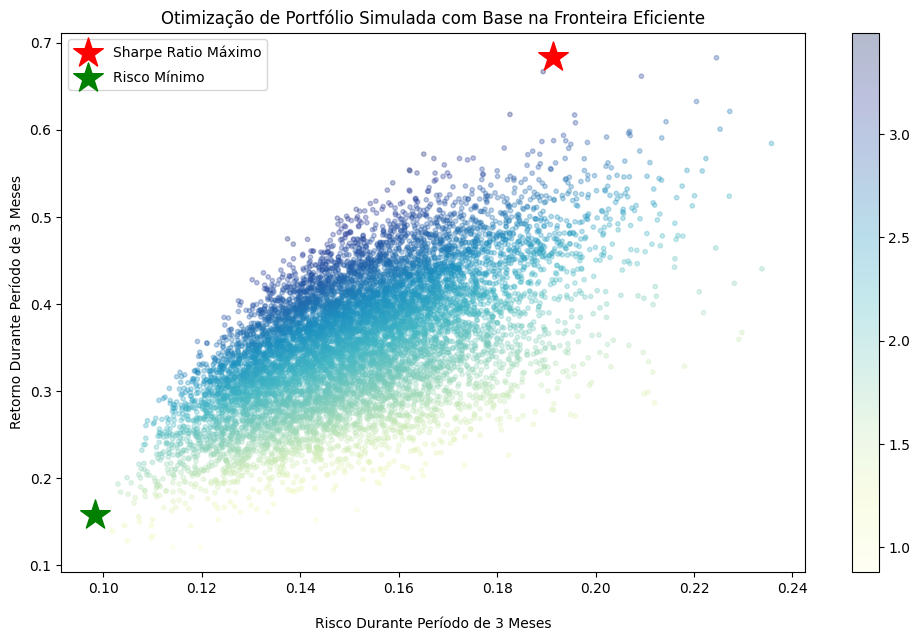

In [64]:
# Executa a função
dsa_display_simulated_ef_with_random(media_retornos, cov_matrix, num_portfolios, taxa_livre_risco)

## Função Para Otimização de Portfólio Calculada com Base na Fronteira Eficiente

In [65]:
# Função
def dsa_display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):

    # Gera uma série de portfólios aleatórios para simular diferentes alocações de ativos
    # e calcula suas estatísticas
    results, _ = dsa_random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate)

    # Encontra o portfólio com o máximo Sharpe Ratio usando a função de otimização
    max_sharpe = dsa_max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)

    # Calcula o desempenho do portfólio com o máximo Sharpe Ratio obtido
    sdp, rp = dsa_portfolio_performance(max_sharpe['x'], mean_returns, cov_matrix)

    # Cria um DataFrame para mostrar a alocação de ativos do portfólio com máximo Sharpe Ratio
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x, index = df_dsa.columns, columns = ['allocation'])

    # Arredonda as alocações para três casas decimais e as converte em porcentagens
    max_sharpe_allocation.allocation = [round(i * 100, 3) for i in max_sharpe_allocation.allocation]

    # Transpõe o DataFrame para facilitar a visualização das alocações
    max_sharpe_allocation = max_sharpe_allocation.T

    # Calcula o portfólio com a mínima volatilidade
    min_vol = dsa_min_variance(mean_returns, cov_matrix)

    # Calcula o desempenho do portfólio com mínima volatilidade
    sdp_min, rp_min = dsa_portfolio_performance(min_vol['x'], mean_returns, cov_matrix)

    # Cria um DataFrame para mostrar a alocação de ativos do portfólio com mínima volatilidade
    min_vol_allocation = pd.DataFrame(min_vol.x, index = df_dsa.columns, columns = ['allocation'])

    # Arredonda as alocações para três casas decimais e as converte em porcentagens
    min_vol_allocation.allocation = [round(i * 100, 3) for i in min_vol_allocation.allocation]

    # Transpõe o DataFrame para facilitar a visualização das alocações
    min_vol_allocation = min_vol_allocation.T

    # Imprime estatísticas detalhadas dos portfólios de máximo Sharpe e mínima volatilidade
    dsa_print_stats(rp, sdp, max_sharpe_allocation, rp_min, sdp_min, min_vol_allocation)

    # Plota os resultados dos portfólios gerados aleatoriamente, incluindo os de máximo Sharpe
    # e mínima volatilidade
    dsa_plot_stats(results, sdp, rp, sdp_min, rp_min, False)

> Relação Max Sharpe calculada com base em nosso portfólio.

--------------------------------------------------------------------------------
Alocação do Portfólio com Índice Sharpe Máximo

Retorno Durante Período de 3 Meses: 0.71
Risco Durante Período de 3 Meses: 0.185


Ticker        AMD  CRM    IREN   NU  QUBT  SNOW    SOFI     TSM  YELP  ZETA
allocation  7.634  0.0  30.815  0.0   0.0   0.0  34.298  24.474   0.0  2.78
--------------------------------------------------------------------------------
Alocação de Portfólio com Risco Mínimo

Retorno Durante Período de 3 Meses: 0.063
Risco Durante Período de 3 Meses: 0.088


Ticker        AMD     CRM  IREN    NU  QUBT  SNOW   SOFI     TSM    YELP  ZETA
allocation  6.694  36.267   0.0  0.46   0.0   0.0  1.155  29.911  25.513   0.0
--------------------------------------------------------------------------------
Retornos e Riscos de Ativos Individuais

AMD : Retorno Durante Período de 3 Meses 0.281 , Risco Durante Período de 3 Meses: 0.212
CRM : Retorno Durante Período de 3 Meses -0.038 , Risco Durant

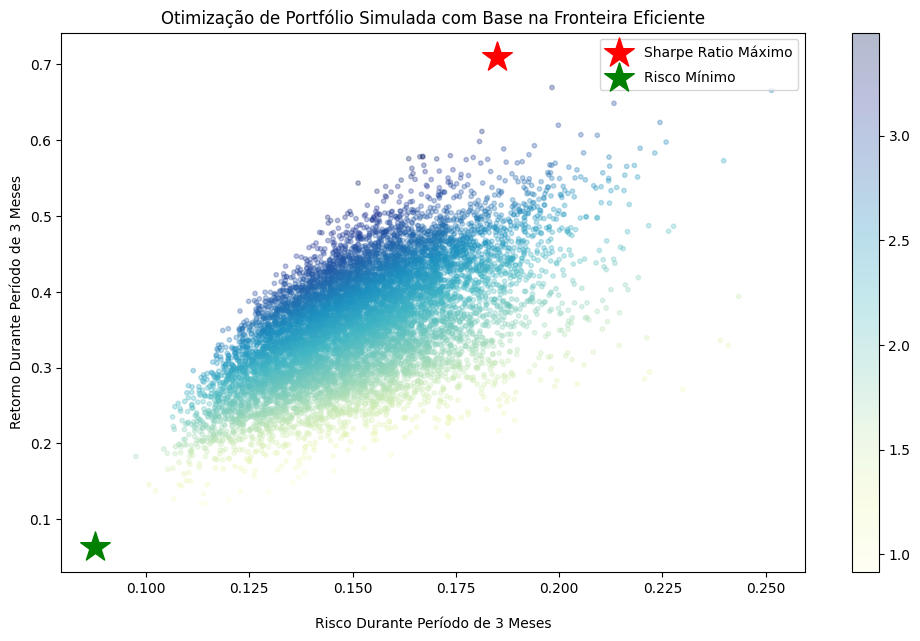

In [66]:
# Executa a função
dsa_display_calculated_ef_with_random(media_retornos, cov_matrix, num_portfolios, taxa_livre_risco)

<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
## Função Para Visualizar a Fronteira Eficiente com a Tangente

In [67]:
# Função
def dsa_display_ef_with_tangent(mean_returns, cov_matrix, risk_free_rate):

    # Calcula a volatilidade e o retorno
    an_vol = np.std(retornos) * np.sqrt(62)
    an_rt = mean_returns * 62

    # Calcula o portfólio com o máximo Sharpe Ratio usando os dados de retorno, covariância e taxa livre de risco
    max_sharpe = dsa_max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)

    # Calcula o desvio padrão e o retorno do portfólio com o máximo Sharpe Ratio
    sdp, rp = dsa_portfolio_performance(max_sharpe['x'], mean_returns, cov_matrix)

    # Cria um DataFrame para a alocação de ativos do portfólio com o máximo Sharpe Ratio
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x, index = df_dsa.columns, columns = ['allocation'])

    # Arredonda as alocações para três casas decimais e converte para porcentagem
    max_sharpe_allocation.allocation = [round(i * 100, 3) for i in max_sharpe_allocation.allocation]

    # Transpõe o DataFrame para melhor visualização
    max_sharpe_allocation = max_sharpe_allocation.T

    # Calcula o portfólio com a mínima volatilidade
    min_vol = dsa_min_variance(mean_returns, cov_matrix)

    # Calcula o desvio padrão e o retorno do portfólio com a mínima volatilidade
    sdp_min, rp_min = dsa_portfolio_performance(min_vol['x'], mean_returns, cov_matrix)

    # Cria um DataFrame para a alocação de ativos do portfólio com a mínima volatilidade
    min_vol_allocation = pd.DataFrame(min_vol.x, index = df_dsa.columns, columns = ['allocation'])

    # Arredonda as alocações para três casas decimais e converte para porcentagem
    min_vol_allocation.allocation = [round(i*100,3) for i in min_vol_allocation.allocation]

    # Transpõe o DataFrame para melhor visualização
    min_vol_allocation = min_vol_allocation.T

    # Imprime as estatísticas dos portfólios calculados
    dsa_print_stats(rp, sdp, max_sharpe_allocation, rp_min, sdp_min, min_vol_allocation, True)

    # Configura uma nova figura e eixo para plotagem
    fig, ax = plt.subplots(figsize = (12, 7))

    # Plota a volatilidade e os retornos anualizados das ações
    ax.scatter(an_vol, an_rt, marker = 'o', s = 200)

    # Anota cada ponto no gráfico com o nome da respectiva ação
    for i, txt in enumerate(df_dsa.columns):
        ax.annotate(txt, (an_vol[i], an_rt[i]), xytext = (10,0), textcoords = 'offset points')

    # Destaca os portfólios de máximo Sharpe e de mínimo risco
    ax.scatter(sdp, rp, marker = '*', color = 'r', s = 500, label = 'Sharpe Ratio Máximo')
    ax.scatter(sdp_min, rp_min, marker = '*', color = 'g', s = 500, label = 'Risco Mínimo')

    # Define um intervalo de retorno alvo para calcular a fronteira eficiente
    target = np.linspace(rp_min, 0.60, 500)

    # Calcula a fronteira eficiente para o intervalo de retorno alvo
    efficient_portfolios = dsa_efficient_frontier(mean_returns, cov_matrix, target)

    # Plota a fronteira eficiente
    ax.plot([p['fun'] for p in efficient_portfolios],
            target,
            linestyle = '-.',
            color = 'black',
            label = 'Fonteira Eficiente')

    # Define títulos e rótulos para o gráfico
    ax.set_title('Otimização de Portfólio com Ativos Financeiros Individuais')
    ax.set_xlabel('Risco Durante Período de 3 Meses')
    ax.set_ylabel('Retorno Durante Período de 3 Meses')
    ax.legend(labelspacing = 0.8)

    # Imprime o desvio padrão e o retorno para verificação
    print(round(sdp,3), round(rp,3))
    print(0, risk_free_rate)

    # Plota uma linha representando a tangente da fronteira eficiente a partir da taxa livre de risco
    plt.plot([0, round(sdp,4)],
             [risk_free_rate, round(rp,4)],
             'k-',
             linewidth = 2,
             label = 'Tangente da Fronteira Eficiente')
    plt.legend()
    plt.show()

    # Cria um dicionário para armazenar os retornos e volatilidades calculados, incluindo o mercado
    d = {}
    for i, txt in enumerate(df_dsa.columns):
        d[txt] = [round(an_rt[i],3), round(an_vol[i],3)]
    d['market'] = [round(rp,3), round(sdp,3)]

    # Retorna o dicionário com os dados calculados
    return d

--------------------------------------------------------------------------------
Alocação do Portfólio com Índice Sharpe Máximo

Retorno Durante Período de 3 Meses: 0.71
Risco Durante Período de 3 Meses: 0.185


Ticker        AMD  CRM    IREN   NU  QUBT  SNOW    SOFI     TSM  YELP  ZETA
allocation  7.634  0.0  30.815  0.0   0.0   0.0  34.298  24.474   0.0  2.78
--------------------------------------------------------------------------------
Alocação de Portfólio com Risco Mínimo

Retorno Durante Período de 3 Meses: 0.063
Risco Durante Período de 3 Meses: 0.088


Ticker        AMD     CRM  IREN    NU  QUBT  SNOW   SOFI     TSM    YELP  ZETA
allocation  6.694  36.267   0.0  0.46   0.0   0.0  1.155  29.911  25.513   0.0
--------------------------------------------------------------------------------
Retornos e Riscos de Ativos Individuais

AMD : Retorno Durante Período de 3 Meses 0.281 , Risco Durante Período de 3 Meses: 0.212
CRM : Retorno Durante Período de 3 Meses -0.038 , Risco Durant

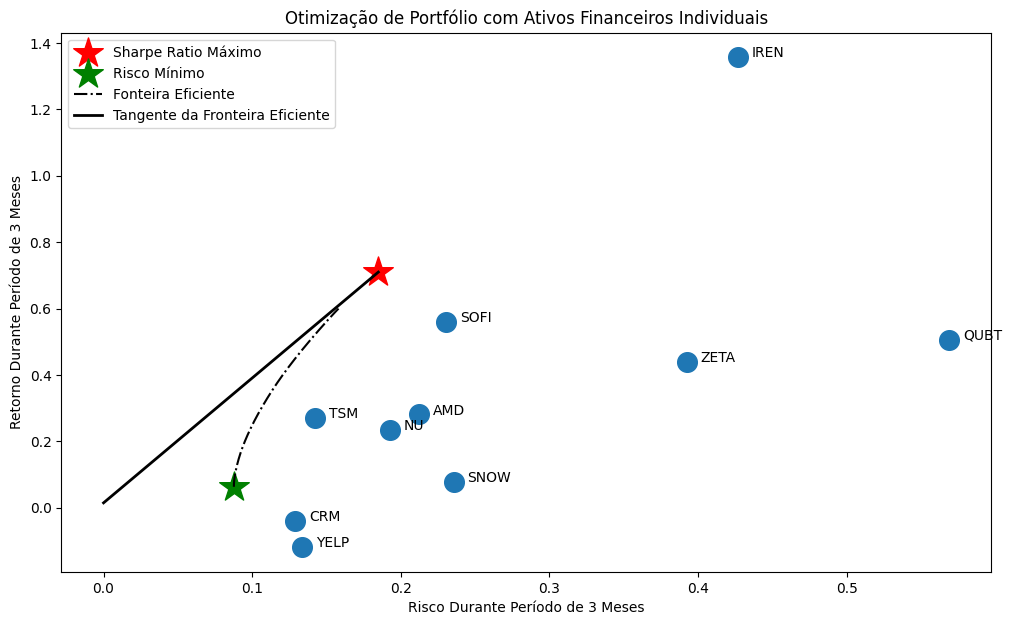

In [68]:
# Executa a função e armazena os resultados
dsa_resultados = dsa_display_ef_with_tangent(media_retornos, cov_matrix, taxa_livre_risco)

## Calculando a Security Market Line

A Linha de Mercado de Títulos (SML), na otimização de portfólio, é uma representação gráfica que mostra a relação entre o risco sistemático de um ativo e seu retorno esperado. Essa linha é uma ferramenta chave no Modelo de Precificação de Ativos Financeiros (CAPM).

A SML é derivada da teoria moderna do portfólio, que busca maximizar o retorno esperado de um portfólio para um nível de risco específico ou minimizar o risco para um nível de retorno desejado. Ela é plotada em um gráfico onde o eixo vertical representa o retorno esperado dos ativos (geralmente em termos de taxa de retorno) e o eixo horizontal representa o risco sistemático dos ativos, muitas vezes medido pelo seu beta.

O beta de um ativo é uma medida de sua sensibilidade em relação ao mercado como um todo. Ativos com betas maiores têm maior sensibilidade às mudanças no mercado, enquanto ativos com betas menores são menos sensíveis.

A SML parte da ideia de que os investidores exigem um prêmio de risco pelo risco sistemático que estão assumindo ao investir em um ativo. Assim, ela mostra o retorno que um investidor deve esperar para assumir um determinado nível de risco sistemático, conforme definido pelo mercado como um todo.

Na otimização de portfólio, a SML é usada para determinar se um ativo está subvalorizado, sobrevalorizado ou corretamente precificado em relação ao seu risco sistemático. Os ativos que estão acima da SML são considerados subvalorizados, pois oferecem um retorno esperado maior do que o esperado para o risco que possuem, enquanto os ativos abaixo da SML são considerados sobrevalorizados.

Portanto, a SML é uma ferramenta valiosa para os investidores na seleção e avaliação de ativos em seus portfólios, ajudando-os a tomar decisões informadas com base na relação entre risco e retorno.









In [69]:
dsa_resultados

{'AMD': [np.float64(0.281), np.float64(0.212)],
 'CRM': [np.float64(-0.038), np.float64(0.129)],
 'IREN': [np.float64(1.357), np.float64(0.427)],
 'NU': [np.float64(0.234), np.float64(0.193)],
 'QUBT': [np.float64(0.506), np.float64(0.569)],
 'SNOW': [np.float64(0.079), np.float64(0.236)],
 'SOFI': [np.float64(0.559), np.float64(0.231)],
 'TSM': [np.float64(0.271), np.float64(0.142)],
 'YELP': [np.float64(-0.119), np.float64(0.134)],
 'ZETA': [np.float64(0.44), np.float64(0.393)],
 'market': [np.float64(0.71), np.float64(0.185)]}

Vamos trabalhar com 3 ativos financeiros.

In [70]:
asset1_er = dsa_resultados['NU'][0]
asset1_vol = dsa_resultados['NU'][1]

In [71]:
asset2_er = dsa_resultados['AMD'][0]
asset2_vol = dsa_resultados['AMD'][1]

In [72]:
asset3_er = dsa_resultados['TSM'][0]
asset3_vol = dsa_resultados['TSM'][1]

In [73]:
market_er = dsa_resultados['market'][0]
market_vol = dsa_resultados['market'][1]

In [74]:
# Define a taxa livre de risco
rf = 0.015

In [75]:
# Market risk premium
mrp = market_er - rf

In [76]:
# Calcula o beta de cada asset
asset1_beta = (asset1_er - rf) / (market_er - rf)
asset2_beta = (asset2_er - rf) / (market_er - rf)
asset3_beta = (asset3_er - rf) / (market_er - rf)

In [77]:
# Print
print(f"Beta do Asset 1: {asset1_beta:.2f}")
print(f"Beta do Asset 2: {asset2_beta:.2f}")
print(f"Beta do Asset 3: {asset3_beta:.2f}")

Beta do Asset 1: 0.32
Beta do Asset 2: 0.38
Beta do Asset 3: 0.37


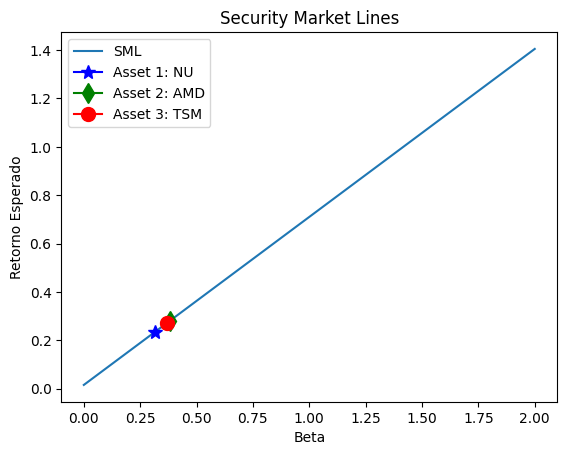

In [78]:
# Define um range de betas para o plot das Security Market Lines
betas = np.linspace(0, 2, 100)

# Calcula os retornos esperados para cada ativo em diferentes níveis de beta
asset1_ers = rf + asset1_beta * (market_er - rf)
asset2_ers = rf + asset2_beta * (market_er - rf)
asset3_ers = rf + asset3_beta * (market_er - rf)

# Calcula as linhas
sml = rf + betas * (market_er - rf)

# Plot das Security Market Lines
plt.plot(betas, sml, label = 'SML')
plt.plot(asset1_beta, asset1_ers, color = 'blue', marker = '*', label = 'Asset 1: NU', markersize = 10)
plt.plot(asset2_beta, asset2_ers, color = 'green', marker = 'd', label = 'Asset 2: AMD', markersize = 10)
plt.plot(asset3_beta, asset3_ers, color = 'red', marker = 'o', label = 'Asset 3: TSM', markersize = 10)

# Labels
plt.xlabel('Beta')
plt.ylabel('Retorno Esperado')
plt.title('Security Market Lines')

# Legenda
plt.legend()

# Show
plt.show()

In [79]:
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [80]:
#%watermark -v -m

In [81]:
#%watermark --iversions

# Fim